<a href="https://colab.research.google.com/github/ishika-b/neural-networks/blob/main/nnfl_assn1_q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statistics 
import random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [ ]:
def hypothesis(w0,w1,w2,x1,x2):
	h = w0 + w1*x1 + w2*x2
	return h;

def costfunction(w0,w1,w2,x1,x2,y,m):
  lam = 0.01
  sum = 0
  for i in range(m):
	  diff = (hypothesis(w0,w1,w2,x1[i],x2[i]) - y[i])
	  sum = sum + (diff**2)
  j = sum / (2*m)
  return j + lam*(abs(w0)+abs(w1)+abs(w2));#check this!

def wupdate(w0,w1,w2,x1,x2,y,m,b):
	sum = 0
	for i in range(m):
		loss = hypothesis(w0,w1,w2,x1[i],x2[i])-y[i]
		sum = sum + (loss*b[i])
	sum = sum / m 
	return sum;

In [ ]:
def grad_descent(w0,w1,w2,x1,x2,y,m):
  alpha=0.05
  num_iterations = 500
  lam = 0.01

  train_cost =[] #to plot variation with iteration

  for t in range(num_iterations):
    temp0 = w0-alpha*lam*np.sign(w0) - alpha*wupdate(w0,w1,w2,x1,x2,y,m,np.ones(245))
    temp1 = w1-alpha*lam*np.sign(w1) - alpha*wupdate(w0,w1,w2,x1,x2,y,m,x1)
    temp2 = w2-alpha*lam*np.sign(w2) - alpha*wupdate(w0,w1,w2,x1,x2,y,m,x2)
    w0 = temp0
    w1 = temp1
    w2 = temp2 
    train_cost.append(costfunction(w0,w1,w2,x1,x2,y,m))

  return(w0,w1,w2,train_cost);

In [ ]:
def minibatch_grad_descent(w0,w1,w2,x1,x2,y,m):
  alpha=0.1
  batch_size = 80 #smaller batch size resulted in wrong direction 
  n_batches = int(m/batch_size)
  lam = 0.01

  train_costs = []

  for t in range(10):
    indices = np.random.permutation(m)
    for i in range(n_batches):    
      x1_batch = []
      x2_batch = []
      y_batch = []

      for j in indices[i*batch_size:(i+1)*batch_size]:
        x1_batch.append(x1[j])
        x2_batch.append(x2[j])
        y_batch.append(y[j])
      
      temp0 = w0 -alpha*lam*np.sign(w0)- alpha*wupdate(w0,w1,w2,x1_batch,x2_batch,y,batch_size,np.ones(batch_size))
      temp1 = w1 - alpha*lam*np.sign(w1)- alpha*wupdate(w0,w1,w2,x1_batch,x2_batch,y,batch_size,x1_batch)
      temp2 = w2 -alpha*lam*np.sign(w2)- alpha*wupdate(w0,w1,w2,x1_batch,x2_batch,y,batch_size,x2_batch)
      w0 = temp0
      w1 = temp1
      w2 = temp2
      train_costs.append(costfunction(w0,w1,w2,x1,x2,y,m))
    print('in iteration', t, 'cost=',costfunction(w0,w1,w2,x1,x2,y,m))
  return(w0,w1,w2,train_costs);

In [ ]:
def stochastic_grad_descent(w0,w1,w2,x1,x2,y,m):
  alpha=0.01
  lam = 0.01

  train_costs=[]
   
  for t in range(5):
    indices = np.random.permutation(m)
    for i in indices: 
      temp0 = w0 -alpha*lam*np.sign(w0)- alpha*(hypothesis(w0,w1,w2,x1[i],x2[i])-y[i])*1
      temp1 = w1 -alpha*lam*np.sign(w1) - alpha*(hypothesis(w0,w1,w2,x1[i],x2[i])-y[i])*x1[i]
      temp2 = w2 -alpha*lam*np.sign(w2)- alpha*(hypothesis(w0,w1,w2,x1[i],x2[i])-y[i])*x2[i]
      w0 = temp0
      w1 = temp1
      w2 = temp2
      train_costs.append(costfunction(w0,w1,w2,x1,x2,y,m))
    print('in iteration', t, 'cost=',costfunction(w0,w1,w2,x1,x2,y,m))
  return(w0,w1,w2,train_costs);

In [ ]:
def plot1(train_cost,num):
  fig = plt.figure()
  fig.suptitle('Learning Curves', fontsize=20)
  plt.xlabel('Number of Iterations', fontsize=14)
  plt.plot(range(0,num),train_cost, label = 'Training Set Cost')
  plt.legend()

final weights batch: -0.00025641025641213403 0.03515598968530438 0.2510911232636193
mse batch= 0.2738908021903441
MSE test without denormalisation batch: 0.2738908021903441
MSE test with denormalisation: 5.432835857934197
in iteration 0 cost= 0.5013345495002007
in iteration 1 cost= 0.5009809088700596
in iteration 2 cost= 0.5009691745391825
in iteration 3 cost= 0.4927914152701308
in iteration 4 cost= 0.5053899383235904
in iteration 5 cost= 0.49974299773028935
in iteration 6 cost= 0.5071571655392668
in iteration 7 cost= 0.49624698787055077
in iteration 8 cost= 0.4930513808013332
in iteration 9 cost= 0.4907325949946582
final weights minibatch: -0.060507536446888055 0.006186366882535034 0.03783433770422669
mse minibatch= 2.2240978996024188
MSE test without denormalisation minibatch: 2.2240978996024188
MSE test with denormalisation: 9.561107899769102
in iteration 0 cost= 0.4651543307293701
in iteration 1 cost= 0.46438558879442887
in iteration 2 cost= 0.46551900076666636
in iteration 3 cost=

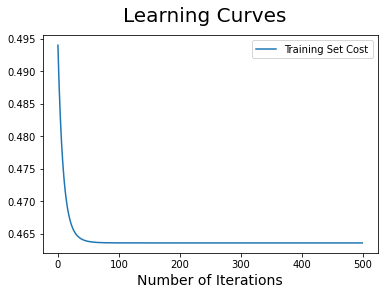

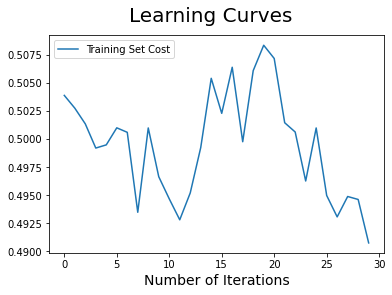

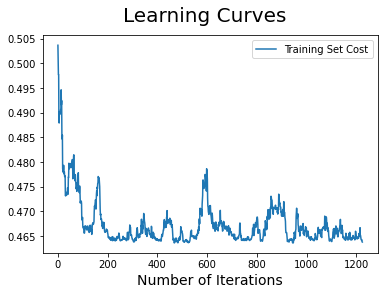

In [ ]:
if __name__ == '__main__':
  #get the information 
  df1 = pd.read_excel("/content/drive/My Drive/nnfl/nnfl/training_feature_matrix.xlsx",header=None,sheet_name="Sheet1")
  df2 = pd.read_excel("/content/drive/My Drive/nnfl/nnfl/training_output.xlsx",header=None,sheet_name="Sheet1")
  df3 = pd.read_excel("/content/drive/My Drive/nnfl/nnfl/test_feature_matrix.xlsx",header=None,sheet_name="Sheet1")
  df4 = pd.read_excel("/content/drive/My Drive/nnfl/nnfl/test_output.xlsx",header=None,sheet_name="Sheet1")

  x1_train = []
  x2_train = []
  y_train = []
  x1_test = []
  x2_test = []
  y_test = []


  #adding training data 
  for i in range(245):
    x1_train.append(df1[0][i])
    x2_train.append(df1[1][i])
    y_train.append(df2[0][i])

  #adding test data 
  for i in range(104):
    x1_test.append(df3[0][i])
    x2_test.append(df3[0][i])
    y_test.append(df4[0][i])

  #standardising test data :((
  mean_x1 = statistics.mean(x1_train)
  stdev_x1 = statistics.stdev(x1_train)
  x1_train = [(x-mean_x1)/stdev_x1 for x in x1_train]
  x1_test = [(x-mean_x1)/stdev_x1 for x in x1_test]

  mean_x2 = statistics.mean(x2_train)
  stdev_x2 = statistics.stdev(x2_train)
  x2_train = [(x-mean_x2)/stdev_x2 for x in x2_train]
  x2_test = [(x-mean_x2)/stdev_x2 for x in x2_test]

  mean_y = statistics.mean(y_train)
  stdev_y = statistics.stdev(y_train)
  y_train =  [(y-mean_y)/stdev_y for y in y_train]
  y_test = [(y-mean_y)/stdev_y for y in y_test]

  #weights initialised to 0
  w0,w1,w2,train_costs = grad_descent(0,0,0,x1_train,x2_train,y_train,245)
  print('final weights batch:',w0,w1,w2)
  mse = 0
  for i in range(104):
   error = (w0 + w1*x1_test[i] + w2*x2_test[i]) - y_test[i]
   #denorm_err = error*stdev_y + mean_y - y_test[i]
   mse = mse + (error ** 2)
  mse = mse/104
  print('mse batch=', mse)
  plot1(train_costs,500)

  mse = 0
  denorm_mse = 0
  for i in range(104):
   error = (w0 + w1*x1_test[i] + w2*x2_test[i]) - y_test[i]
   denorm_err = error*stdev_y + mean_y - y_test[i]
   mse = mse + (error ** 2)
   denorm_mse = mse + (denorm_err ** 2)
  mse = mse/104
  denorm_mse = denorm_mse/104
  print("MSE test without denormalisation batch:",mse)
  print("MSE test with denormalisation:",denorm_mse)

  w0,w1,w2,train_costs = minibatch_grad_descent(0,0,0,x1_train,x2_train,y_train,245)
  print('final weights minibatch:',w0,w1,w2)
  mse = 0
  for i in range(104):
   error = (w0 + w1*x1_test[i] + w2*x2_test[i]) - y_test[i]
   #denorm_err = error*stdev_y + mean_y - y_test[i]
   mse = mse + (error ** 2)
  mse = mse/104
  print('mse minibatch=', mse)
  plot1(train_costs,30)


  mse = 0
  denorm_mse = 0
  for i in range(104):
   error = (w0 + w1*x1_test[i] + w2*x2_test[i]) - y_test[i]
   denorm_err = error*stdev_y + mean_y - y_test[i]
   mse = mse + (error ** 2)
   denorm_mse = mse + (denorm_err ** 2)
  mse = mse/104
  denorm_mse = denorm_mse/104
  print("MSE test without denormalisation minibatch:",mse)
  print("MSE test with denormalisation:",denorm_mse)

  w0,w1,w2,train_costs = stochastic_grad_descent(0,0,0,x1_train,x2_train,y_train,245)
  print('final weights stochastic:',w0,w1,w2)
  mse = 0
  for i in range(104):
   error = (w0 + w1*x1_test[i] + w2*x2_test[i]) - y_test[i]
   #denorm_err = error*stdev_y + mean_y - y_test[i]
   mse = mse + (error ** 2)
  mse = mse/104
  print('mse stochastic=', mse)
  plot1(train_costs,245*5)

  mse = 0
  denorm_mse = 0
  for i in range(104):
   error = (w0 + w1*x1_test[i] + w2*x2_test[i]) - y_test[i]
   denorm_err = error*stdev_y + mean_y - y_test[i]
   mse = mse + (error ** 2)
   denorm_mse = mse + (denorm_err ** 2)
  mse = mse/104
  denorm_mse = denorm_mse/104
  print("MSE test without denormalisation stochastic:",mse)
  print("MSE test with denormalisation:",denorm_mse)

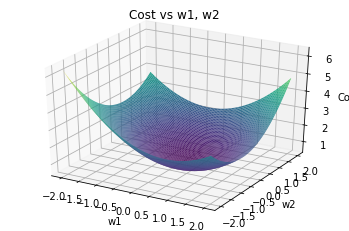

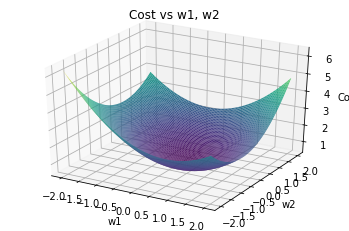

In [ ]:
def plot2(x1,x2,y,m):
  grid_size = 100
  w1 = np.linspace(-2, 2, grid_size)
  w2 = np.linspace(-2, 2, grid_size)

  losses = np.zeros((grid_size, grid_size))
  for i in range(grid_size):
      for j in range(grid_size):
          losses[i][j] = costfunction(0,w1[i],w2[j],x1,x2,y,m)

  ax = plt.axes(projection = '3d')
  W0, W1 = np.meshgrid(w1, w2)
  ax.plot_surface(W0, W1, losses, rstride = 1, cstride = 1,
                  cmap = 'viridis', edgecolor = 'none')

  ax.set_xlabel('w1')
  ax.set_ylabel('w2')
  ax.set_zlabel('Cost')
  plt.title('Cost vs w1, w2')
  plt.show()

plot2(x1_train,x2_train,y_train,245)
plot2(x1_train,x2_train,y_train,245)